<a href="https://colab.research.google.com/github/Shashank-Holla/CNN_for_CIFAR10/blob/master/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [2]:
cd '/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10/'

/gdrive/My Drive/Colab Notebooks/SchoolOfAI/Session7_CIFAR/cnn_for_cifar10


In [3]:
ls

data/                                  main.ipynb    train.py
Execute.ipynb                          metrics.py    transform_albumentation.py
GraphsForLearning.ipynb                models/       Transform_Filecall.ipynb
ImageAugmentation_Albumentation.ipynb  __pycache__/  transform.py
mainfile.py                            test.py


In [4]:
#import all necessary .py files
import torch
import torch.nn as nn
import torch.optim as optim
from torchsummary import summary
!pip install -U git+https://github.com/albu/albumentations --no-cache-dir

from train import train
from test import test
from metrics import train_test_metrics_graph

#Torchvision transforms
#from transform import transform
#Albumentations transform
from transform_albumentation import transform
from models import *
from gradcam import *

  Cloning https://github.com/albu/albumentations to /tmp/pip-req-build-f07qasjv
  Running command git clone -q https://github.com/albu/albumentations /tmp/pip-req-build-f07qasjv
  Created wheel for albumentations: filename=albumentations-0.4.5-cp36-none-any.whl size=64514 sha256=ddac1f77994587b80ccdfd07b1efef84c5cf78390b2a14d63acb8b507a8eb77c
  Stored in directory: /tmp/pip-ephem-wheel-cache-yxgb835r/wheels/45/8b/e4/2837bbcf517d00732b8e394f8646f22b8723ac00993230188b
Successfully built albumentations
  Found existing installation: albumentations 0.4.5
    Uninstalling albumentations-0.4.5:
      Successfully uninstalled albumentations-0.4.5
Albumentations version: 0.4.5
Resnet18 model


In [5]:
#Check the number of parameters
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
print(device)
#My model
#net = Net().to(device)

#Resnet18 model
net = ResNet18().to(device)
summary(net, input_size=(3, 32, 32))

cuda
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1,

Train set
Files already downloaded and verified
Test set
Files already downloaded and verified
epoch: 0
[1,   300] loss: 0.270
Epoch Train loss: 1.756485193509322         Epoch Train Accuracy: 35.326
Epoch Test loss: 1.2588438082344924         Epoch Test Accuracy: 54.52
epoch: 1
[2,   300] loss: 0.209
Epoch Train loss: 1.3638751849150046         Epoch Train Accuracy: 50.854
Epoch Test loss: 0.9521561868583099         Epoch Test Accuracy: 66.53
epoch: 2
[3,   300] loss: 0.176
Epoch Train loss: 1.159083728148387         Epoch Train Accuracy: 58.614
Epoch Test loss: 0.8032711404788343         Epoch Test Accuracy: 71.95
epoch: 3
[4,   300] loss: 0.156
Epoch Train loss: 1.0340666072490887         Epoch Train Accuracy: 63.404
Epoch Test loss: 0.7406457768210882         Epoch Test Accuracy: 74.46
epoch: 4
[5,   300] loss: 0.143
Epoch Train loss: 0.9502728268122062         Epoch Train Accuracy: 66.448
Epoch Test loss: 0.6921757731256606         Epoch Test Accuracy: 75.51
epoch: 5
[6,   300] lo

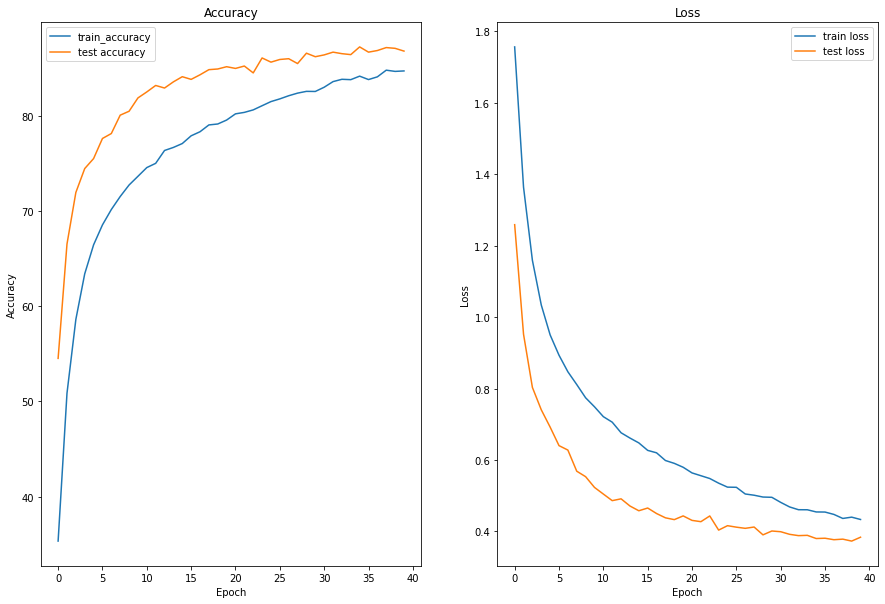

In [6]:
EPOCHS =40
train_accuracy = []
test_accuracy = []
train_loss = []
test_loss = []
from torch.optim.lr_scheduler import StepLR 

#import CIFAR10 data. Perform Normalize, Batching through transforms.
trainloader, testloader, classes = transform()

criterion = nn.CrossEntropyLoss()
# Optimum LR for custom_model = 0.015
optimizer = optim.SGD(net.parameters(), lr=0.007, momentum=0.9, weight_decay=0.001)
# scheduler = StepLR(optimizer, step_size=3, gamma=0.001)


for epoch in range(EPOCHS):
  print("epoch:", epoch)
  train_accuracy_delta, train_loss_delta = train(net, device, trainloader, optimizer, criterion, epoch)
  test_accuracy_delta, test_loss_delta = test(net, device, testloader, criterion)
  # scheduler.step()
  train_accuracy.append(train_accuracy_delta)
  train_loss.append(train_loss_delta)
  test_accuracy.append(test_accuracy_delta)
  test_loss.append(test_loss_delta)
  
print("Train Accuracy-",train_accuracy)
print("Test Accuracy-",test_accuracy)

print("Train loss-",train_loss)
print("Test loss-",test_loss)
train_test_metrics_graph(train_accuracy, train_loss, test_accuracy, test_loss)

In [0]:
# CHeck the contents of the .py file.
# %pycat metrics.py